# Analyzing the Market Impact of SCIO Press Conferences and Policy Interpretations
## Ziqi Yang

##### Stock markets around the world often respond strongly to the tone and wording of official government reports and press briefings, this is especially trule in China. This sensitivity is amplified due to the nuanced nature of the language used in announcements, where even subtle changes in wording can convey complete different messages to investors. I have worked in the finance industry for over two years, and I know that policy-oriented equity analysis is a popular method used by many investors and financial institutions both inside and outside China. So this project is a simplified version of their sophisticated models, in which I aim to analyze the market impact of sentiment scores of government reports and press briefings of the Chinese government.

##### Historical examples provided some further evidence for potential correlations. For example, during a March 2020 SCIO (State Council Information Office) press conference, the announcement of economic support measures to counter the pandemic resulted in a +2.5% jump in the SSE Index within 24 hours and a 25% spike in trading volumes. Also, in October 2021, the SCIO briefing on tightening real estate policies was followed by a -2% drop in the SSE Real Estate Index over two days, with slower trading volumes reflecting increased uncertainty among investors. These examples suggest that the tone of language, whether optimistic or cautious, might influence market movements.

##### Furthermore, the choice of language in SCIO briefings often serves as a signal to investors. Phrases like "稳步推进" (steadily advancing) vs. "全力以赴" (spare no effort) indicate different levels of urgency or priority. This allow investors to know policy directions. In bull markets (hiking market), positive sentiment appears to amplify gains as investors feel reassured. However, during economic downturns, cautious tones might coincide with declines as broader macroeconomic concerns dominate investor behavior.

##### Finally, case studies provide further evidence of this possible relationship. In July 2022, the announcement of fiscal stimulus policies to accelerate infrastructure spending was followed by a +2.3% rise in the SSE Index within 24 hours and a +5% surge in infrastructure sector stocks. Similarly, in December 2022, the easing of COVID-19 restrictions with optimistic language such as "全面开放" ("comprehensive reopening") coincided with a +1.9% gain in the SSE Index, with tourism and consumer stocks climbing more than +7%.

##### These observations highlight potential patterns between the sentiment conveyed in SCIO press conferences and subsequent stock market reactions, suggesting that language nuances might play a role in shaping investor perceptions and market movements.

##### I hypothesize that the use of conservative language in a government announcement might lead to a moderate sentiment score, since it suggests the government believes the market is overheating and needs to be cooled down through conservative or contractionary fiscal policies. In this case, the market may anticipate future contraction and withdraw investments to avoid potential losses. Conversely, when the government uses an active tone to convey positive information about upcoming stimulus policies, the market might expect a favorable future strategy and increase investments to secure better positions for potential future gains. However, in reality, this might not always hold true. A positive tone indicating expansionary policies could lead to an increase in the exchange rate or signal that the economy is currently in poor condition. Despite these complexities, we still expect to observe some correlation between sentiment and market reactions.

##### Main hypothesis: Hypothesis: The sentiment and wording nuances in State Council Information Office (SCIO) press conferences and official policy interpretations have a significant impact on short-term stock market movements and overall market sentiment in China. Positive wording or optimistic sentiment will correlate with gains, while negative or cautious tones will correlate with declines.

##### Assumptions: 
##### 1. Subtle differences in wording (e.g., severity, tone, or positive/negative sentiment) influence investor perceptions.
##### 2. Markets react quickly to government announcements.
##### 3. Stock indices and key sectors will show measurable volatility following SCIO press conferences.

##### Data: 
##### For government announcements, I gathered minutes of every major State Council Information Office (SCIO) press conference. After each council, there will also be one or two official interpretations of policy trends, along with a brief report titled Official Press Reports for each SCIO press conference. Sometimes the government releases special announcements to address specific problems, such as redirecting policy focus away from real estate or warning about industry-specific bubbles. Additionally, press conferences are used to announce fiscal and central bank monetary policies.

##### To analyze market reactions and the policy impact on the stock market or the broader economy, I chose the Shanghai Composite Index Historical Data, as it represents the performance of China's most important stock market, which can, to some extent, reflect investor confidence and behavior in China. I also analyzed other industry-specific indices, such as the China Real Estate Index System (CREIS), the National Real Estate Climate Index, and the Composite PMI.

#### Step 1:
##### First, I tested my methods by analyzing the big announcement on September 24 about adopting expansionary policies, like cutting reserve requirement ratios and interest rates to boost the stock market. After these announcements, the stock market went up significantly. At this stage, I wasn’t trying to test for any correlations. just checking if my methods for gathering and analyzing data worked properly.

##### # The four announcements bellow are published late September, 2024: "Financial Support Measures for High-Quality Economic Development Introduced"; "Stabilizing Expectations and Confidence: Multiple Financial Policies Join Forces to Support High-Quality Economic Development"; "SCIO Press Conference Held to Introduce Financial Support for High-Quality Economic Development"; "Rate Cuts and Reserve Requirement Reductions! Monetary Policies Strengthen Efforts to Support Stable Growth".

In [2]:
import requests
from bs4 import BeautifulSoup


# The four announcements bellow are published late September, 2024:
# "Financial Support Measures for High-Quality Economic Development Introduced"
# "Stabilizing Expectations and Confidence: Multiple Financial Policies Join Forces to Support High-Quality Economic Development"
# "SCIO Press Conference Held to Introduce Financial Support for High-Quality Economic Development"
# "Rate Cuts and Reserve Requirement Reductions! Monetary Policies Strengthen Efforts to Support Stable Growth"


urls = [
    "https://www.gov.cn/zhengce/202409/content_6976303.htm",  
    "https://www.gov.cn/zhengce/202409/content_6976242.htm",  
    "https://www.gov.cn/zhengce/202409/content_6976189.htm",  
    "https://www.gov.cn/zhengce/202409/content_6976178.htm" 
]


results = []

# Request data, iterates through a list of URLs, retrieves the HTML content of each page,
# extracts text from a element with the class trs_editor_view TRS_UEDITOR trs_paper_default trs_web,
# and appends the extracted content to a results list.


for url in urls:
    response = requests.get(url)
    response.encoding = 'utf-8'
    soup = BeautifulSoup(response.text, 'html.parser')
    content_div = soup.find('div', class_='trs_editor_view TRS_UEDITOR trs_paper_default trs_web')
    content = content_div.get_text(strip=True)
    results.append(content)


# Write results acquired in to a file called results
with open('/Users/ziqiyang/Desktop/TAP Project Ziqi Yang/results.txt', 'w', encoding='utf-8') as f:
    for idx, result in enumerate(results):
        f.write(f"content {idx + 1}:\n{result}\n\n")


##### These libraries are great tools for working with Chinese text and analyzing data. jieba is helpful in the TF-IDF analysis since can break down Chinese sentences into individual words, which is also important for tasks like counting word frequency or figuring out key terms. WordCloud makes it easy to turn those words into visualizations where the most frequent words stand out. You can use matplotlib.pyplot to create all kinds of charts and plots, like showing trends or patterns in your text analysis.


##### At first, I tried translating Chinese text into English and using traditional NLP tools for analysis, but they always gave moderate sentiment scores, no matter which translation tool I used. Obviously, translating everything manually wasn’t an option. Then a senior engineer introduced me to SnowNLP. It’s a fit tool for analyzing the sentiment of Chinese text, giving adquate sentiment scores, also by using it, I can do cleanning work in Chinese! It defeinitly make one feel more comfortable when working with the origional text instead of translated script, since mistranslation and other types of error are unavoidable in the trasnlation process, and I cannot mannually inspect the process. Also, you don’t need to train any models, it’s ready to use. This tool has been vital for my sentiment analysis tasks, and so far it also helped in other projects involving Chinese text as well.

##### TfidfVectorizer helps pick out the most important words in your text, ignoring the common ones, while pandas is good for organizing, cleaning, and summarizing your data in tables. thulac (Tsinghua University Lexical Analyzer for Chinese) is another tool for cutting up Chinese sentences and tagging words with their parts of speech, which is great for digging deeper into language patterns. For finding topics in large amounts of text, gensim lets you build LDA models to group similar content together. Finally, Counter is a quick and simple way to count how many times each word appears.

In [4]:
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from snownlp import SnowNLP
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import thulac
from gensim import corpora
from collections import Counter
from gensim.models import LdaModel


stop_words = set([
    "的", "了", "在", "和", "有", "等", "与", "这", "那",
    "我", "你", "他", "她", "它", "我们", "你们", "他们",
    "做", "说", "能", "将", "让", "来", "去",
    "很", "非常", "也", "都", "再", "只", "还",
    "对", "从", "到", "为", "给",
    "和", "或", "但", "而", "如果", "因为", "所以",
    "着", "过", "吗", "些", "个", "种", "一些", "所有","内容"
])
# These stop words also includes some sentiment expressions, such as  "很", "非常". They can be translated in to "very" in english, 
# however, in Chinese, they do not always convey or carry sentiment information, they are used to complete the sentence rather 
# than provide important information, especially in a formal occasion such as government press conference. Other stop words removed 
# are common stop words we see in english. 

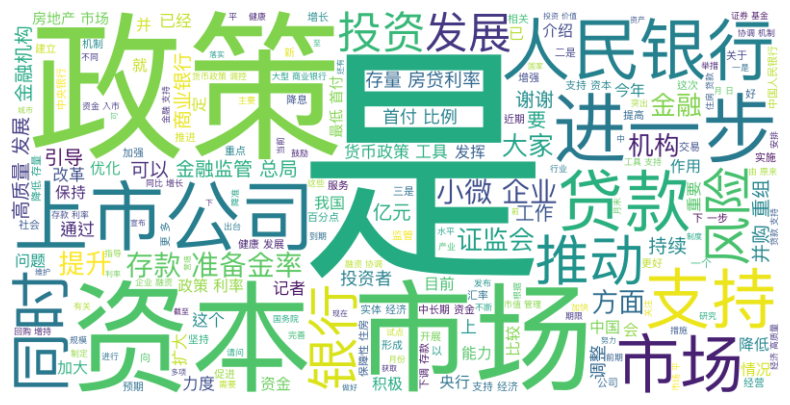

In [7]:
with open('/Users/ziqiyang/Desktop/TAP Project Ziqi Yang/results.txt', 'r', encoding='utf-8') as f:
    results = f.readlines()

processed_results = []
for line in results:
# jieba is for Chinese words segmentation
    words = jieba.cut(line.strip())
    filtered_words = [word for word in words if word not in stop_words]
    processed_results.append(" ".join(filtered_words))


text = " ".join(processed_results)

# Font
wordcloud = WordCloud(font_path='/System/Library/Fonts/Supplemental/PingFang.ttc',  
                      width=800,
                      height=400,
                      background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 不显示坐标轴
plt.show()

# Create a simple Chinese wordcloud of the result

#### Step 2: sentiment analysis
##### Now the sentiment analysis. First, combines all processed text into a single string and splits it into sentences using the Chinese period (。) . For each sentence, calculates a sentiment score using SnowNLP, where a score closer to 1 indicates positive sentiment and closer to 0 indicates negative sentiment. These scores, along with the sentences, are stored in a list. Then computes the total number of sentences, identifies how many have a sentiment score above a threshold of 0.5 (this might not be useful in the final correlation analysis, and calculates the average sentiment score across all sentences. These results are printed and saved to a file, including the total number of sentences, the count of positively scored sentences, and the average sentiment score.

In [31]:
all_text = ' '.join(processed_results)


sentences = all_text.split('。')

sentiment_scores = []

for sentence in sentences:
    sentence = sentence.strip()
    if sentence:
        s = SnowNLP(sentence)
        sentiment_scores.append((sentence, s.sentiments)) 

total_sentences = len(sentiment_scores)
print(f"total sentences: {total_sentences}")
threshold = 0.5  
filtered_sentences = [(line, score) for line, score in sentiment_scores if score > threshold]
filtered_count = len(filtered_sentences)

print(f"sentences with sentiment score more than {threshold} : {filtered_count}")
with open('/Users/ziqiyang/Desktop/TAP Project Ziqi Yang/sentiment.txt', 'w', encoding='utf-8') as f:
    f.write(f"total sentences: {total_sentences}\n")
    f.write(f"sentences with sentiment score more than {threshold} : {filtered_count}\n")

if total_sentences > 0:
    average_sentiment = sum(score for _, score in sentiment_scores) / total_sentences
else:
    average_sentiment = 0  
    # Avoid division by zero

print(f"Average sentiment score: {average_sentiment:.4f}")

# Append the average sentiment score to the output file
with open('/Users/ziqiyang/Desktop/TAP Project Ziqi Yang/sentiment.txt', 'a', encoding='utf-8') as f:  # 'a' mode for append
    f.write(f"average sentiment score: {average_sentiment:.4f}\n")

total sentences: 470
sentences with sentiment score more than 0.5 : 392
Average sentiment score: 0.8059


#### Step 3: TF-IDF
##### Create a TF-IDF vectorizer using TfidfVectorizer to calculate the term frequency-inverse document frequency (TF-IDF) scores for the processed text data. Transforms the processed text into a TF-IDF matrix, retrieves the feature names (words), and converts the matrix into a DataFrame for better visualization. Then calculates the average TF-IDF score for each word across all documents and stores these scores in another DataFrame, sorting the words by their average TF-IDF values in descending order. The top 10 words with the highest average TF-IDF scores are printed and saved to a file for further analysis. This allows for identifying the most important terms in the text data. Again, TF-IDF may not be part of correlation analysis, but I know word frequency is a key indicator in many quantitative analysis investment models.

In [8]:
vectorizer = TfidfVectorizer()


tfidf_matrix = vectorizer.fit_transform(processed_results)

feature_names = vectorizer.get_feature_names_out()

df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)


average_tfidf = df_tfidf.mean(axis=0)


df_average_tfidf = pd.DataFrame(average_tfidf, columns=["Average TF-IDF"]).sort_values(by="Average TF-IDF", ascending=False)

print("\naverage TF-IDF score (the first 10):")
print(df_average_tfidf)

top_10_tfidf = df_average_tfidf.head(10)
with open('/Users/ziqiyang/Desktop/TAP Project Ziqi Yang/TF-IDF.txt', 'w', encoding='utf-8') as f:
    f.write("\naverage TF-IDF score (the first 10):\n")
    f.write(top_10_tfidf.to_string(index=True))


average TF-IDF score (the first 10):
         Average TF-IDF
content        0.333333
支持             0.074437
市场             0.065821
贷款             0.062749
政策             0.056688
...                 ...
有没有            0.000385
有着             0.000385
有钱             0.000385
即将             0.000385
即可             0.000385

[1783 rows x 1 columns]


##### Use THULAC for word segmentation and part-of-speech tagging by calling thulac.thulac() and process the input text using thu.cut(). The resulting segmented text is split into a list of words, and meaningless entities such as punctuation and special symbols are filtered out. Only meaningful words with at least two characters are kept. Use Counter module, calculate the frequency of each word and identifies the top 10 most frequent entities. These entities, along with their occurrence counts, are printed to the console and saved to a file. This process highlights the most significant entities in the text for further analysis. 

##### The top 10 entity is: bank, market, policy, finance, support, interest rate, loan, development, company, people.

In [10]:
thu = thulac.thulac()

result  = thu.cut(text, text=True)

words = result.split()

filtered_words = [word.split('_')[0] for word in words if '_' in word and len(word.split('_')[0]) > 1]

word_counts = Counter(filtered_words)

top_10 = word_counts.most_common(10)

print("top 10 entity:")
for word, count in top_10:
    print(f"entity: {word}, count: {count}")

with open('/Users/ziqiyang/Desktop/TAP Project Ziqi Yang/entity.txt', 'w', encoding='utf-8') as f:
    f.write("\ntop 10 entity:")
    for word, count in top_10:
        f.write(f"entity: {word}, count: {count}\n")

Model loaded succeed
top 10 entity:
entity: 银行, count: 161
entity: 市场, count: 160
entity: 政策, count: 148
entity: 金融, count: 120
entity: 支持, count: 99
entity: 利率, count: 94
entity: 贷款, count: 93
entity: 发展, count: 74
entity: 公司, count: 74
entity: 人民, count: 73


#### Topic modeling and LDA
##### This step, like TF-IDF, is not part of hypothesis testing, but I expect that it can be useful in the future when I want to filter documents that are relevant to a certain topic that I am interested in. I finished this step with some external guide and guide from ChatGPT.

##### Perform topic modeling on a text corpus using the Latent Dirichlet Allocation (LDA) model. First, preprocesses the text, segment it into words with jieba and filtering out stopwords and single characters. The filtered words are added to a list called topic_modeling, which is then used to create a dictionary mapping each unique word to an ID. A corpus is built by converting each document into a BoW representation. An LDA model is trained on the corpus with 4 topics (num_topics=4). For each topic, extract keywords and saves them to a file. Calculates the topic distribution for each document, identifies the main topic (the one with the highest weight), and includes the relevant keywords for that topic. 

In [12]:
topic_modeling = []
for line in results:
    topic_words = jieba.cut(line.strip()) 
    topic_filtered_words = [word for word in topic_words if word not in stop_words and len(word) > 1]  
    print(topic_filtered_words)
    if topic_filtered_words:  
        topic_modeling.append(topic_filtered_words)


dictionary = corpora.Dictionary(topic_modeling)
corpus = [dictionary.doc2bow(doc) for doc in topic_modeling]

num_topics = 4  
# set topic amount
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)


with open('/Users/ziqiyang/Desktop/TAP Project Ziqi Yang/texttopic.txt', 'w', encoding='utf-8') as f:
    for idx, topic in lda_model.print_topics(-1):
        # Key words
        words = topic.split(' + ')
        keywords = ', '.join([word.split('*')[1].strip().strip('"') for word in words])
        f.write(f"Topic {idx + 1}: keywords：{keywords}\n")

    # Topic distribution
    for i, doc in enumerate(corpus):
        doc_topics = lda_model.get_document_topics(doc)
        main_topic = max(doc_topics, key=lambda x: x[1])
        topic_idx, weight = main_topic
        topic_words = lda_model.print_topics(-1)[topic_idx][1]
        keywords = ', '.join([word.split('*')[1].strip().strip('"') for word in topic_words.split(' + ')])
        f.write(
            f"Document {i + 1} relavant to {topic_idx} ，weight: {weight:.6f}，indicating the text relavent to {topic_idx}，including：{keywords}\n"
        )

['content']
['下调', '存款', '准备金率', '降低', '存量', '房贷利率', '创设', '货币政策', '工具', '支持', '资本', '市场', '金融', '支持', '经济', '高质量', '发展', '系列', '措施', '推出', '根据', '中央', '决策', '部署', '进一步', '支持', '经济', '稳定增长', '中国人民银行', '坚定', '坚持', '支持性', '货币政策', '立场', '加大', '货币政策', '调控', '强度', '提高', '货币政策', '调控', '精准', '经济', '稳定增长', '高质量', '发展', '创造', '良好', '货币', '金融', '环境', '24', '国务院新闻办', '新闻', '发布会', '中国人民银行', '行长', '潘功胜', '宣布', '推出', '金融', '支持', '经济', '高质量', '发展', '一系列', '措施', '金融监管', '总局局长', '李云泽', '中国证监会', '主席', '吴清', '出席', '本次', '发布会', '共同', '介绍', '金融', '支持', '经济', '高质量', '发展', '有关', '情况', '下调', '存款', '准备金率', '0.5', '百分点', '金融市场', '提供', '长期', '流动性', '万亿元', '发布会', '潘功胜', '宣布', '近期', '中国人民银行', '下调', '存款', '准备金率', '0.5', '百分点', '金融市场', '提供', '长期', '流动性', '万亿元', '同时', '降低', '中央银行', '政策', '利率', '天期', '回购', '操作', '利率', '下调', '0.2', '百分点', '目前', '1.7%', '调降', '1.5%', '引导', '贷款', '市场', '报价', '利率', '存款', '利率', '同步', '下行', '保持', '商业银行', '息差', '稳定', '降准', '政策', '实施', '银行业', '平均', '存款', '准备金率', '大概', '6.6%', '这个', '水平', '国际'

#### Step 3: visualize the correlation
##### Since the official press conferences started being released after 2019, and before 2019 the stock index did not show much volatility, I collected sentiment scores of government reports and stock indices at the time of those reports' releases from January 2019 to October 2024. I performed steps 1 and 2 on all these files. If press conference briefings, policy interpretations, and official minutes were announced on the same day or within two days, I combined them into one text file and calculated the average sentiment score. In total, I collected 35 sets of briefings and interpretations.
##### Since the date format was not included in these files and the stock index data also had irregular date formats, I had to manually match the timely stock index data to the dataframe beside their corresponding press briefings that were announced one day earlier. The code was too long and repetitive, so I will just include the resulting CSV file to show the sentiment scores and corresponding market reactions. I couldn't gather the timely volatility data as it is difficult to compute—typically, investment firms use specialized models that require significant resources to calculate volatility data. However, I believe volatility is a more accurate measure of how strongly the market reacts to each press briefing.
##### First loads the data, make sure the dates are properly formatted as datetime objects. Then, clean the index column by removing commas and converting the values into numbers, also ensure the sentiment scores are numeric. Plot the stock index and sentiment scores on the same chart. 

/var/folders/vz/0467fbfj6zq9ky58xtzdgh0w0000gn/T/ipykernel_56394/1589951226.py:13: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'])


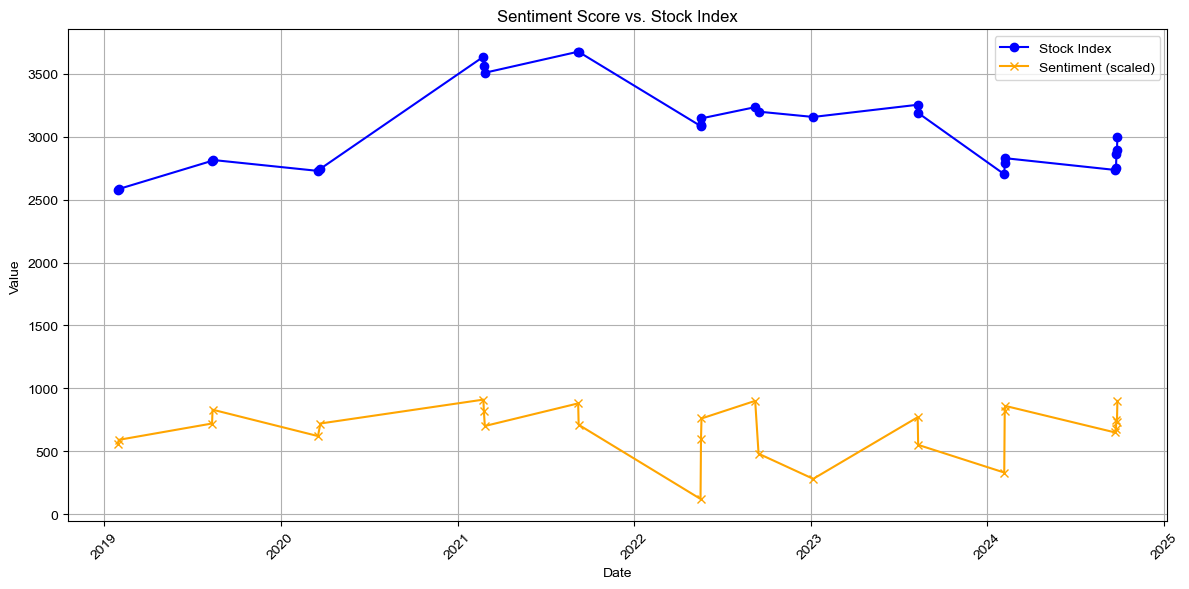

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Set global font
plt.rcParams['font.sans-serif'] = ['Arial'] 
plt.rcParams['axes.unicode_minus'] = False 

file_path = '/Users/ziqiyang/Desktop/TAP Project Ziqi Yang/index_data.csv'
df = pd.read_csv(file_path, sep=';')


df['date'] = pd.to_datetime(df['date'])

df['index'] = df['index'].str.replace(',', '').astype(float)  # Remove commas and convert to float
df['sentiment'] = pd.to_numeric(df['sentiment'])  # Ensure sentiment is numeric

plt.figure(figsize=(12, 6))


plt.plot(df['date'], df['index'], marker='o', label='Stock Index', color='blue')


plt.plot(df['date'], df['sentiment'] * 1000, marker='x', label='Sentiment (scaled)', color='orange')

plt.title('Sentiment Score vs. Stock Index')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()


plt.show()



#### Conclusion
##### It’s easy to feel reassured when the stock index and sentiment score seem to move in the same direction, but a closer look at stock index volatility shows that it doesn’t always match the sentiment of government announcements. Volatility is actually a better measure for studying market reactions since broader macroeconomic conditions can influence both government sentiment and market behavior. There’s also the issue of reverse causation and other factors left out of the model, which could be key.

##### That said, my simple hypothesis got a rough test and seemed somewhat true. However, when I ran an OLS regression on a bigger dataset (which was not very reliable, so lefted it out of this project) and tested for lagged effects, the results weren’t significant, and there wasn’t much correlation. For example, between 2016 and 2019, government reports on real estate consistently had low and declining sentiment scores, but the market still believed the industry was booming and kept heavily investing. It’s interesting because people often criticize the government for ignoring the housing bubble, yet they were clearly trying to warn the market about it.

##### In the end, I think it’s safer to conclude that macroeconomic conditions can override the sentiment in government announcements. Studying this relationship would require considering many more factors. A more sophisticated model and better data collection methods would be needed—something so complex that such a service might cost over 40 million RMB to banks in the market.

#### Reference

##### State Council of the People's Republic of China. (2024, September). [Title or topic of the policy announcement, if known]. Retrieved from https://www.gov.cn/zhengce/202409/content_6976303.htm

##### State Council of the People's Republic of China. (2024, September). [Title or topic of the policy announcement, if known]. Retrieved from https://www.gov.cn/zhengce/202409/content_6976242.htm

##### State Council of the People's Republic of China. (2024, September). [Title or topic of the policy announcement, if known]. Retrieved from https://www.gov.cn/zhengce/202409/content_6976189.htm

##### State Council of the People's Republic of China. (2024, September). [Title or topic of the policy announcement, if known]. Retrieved from https://www.gov.cn/zhengce/202409/content_6976178.htm

##### Policy Impact on the Chinese Stock Market: From the 1994 Bailout to the 2015 Crash MDPI. (n.d.). Retrieved from https://www.mdpi.com/2227-7072/5/1/4

##### Examining the Impact of Political Stability on Stock Price Crash Risk: Evidence from China Springer. (n.d.). Retrieved from https://link.springer.com/article/10.1007/s13132-023-01428-0

##### Impact of Recent Chinese Stock Market Liberalization: History and Literature Review SSRN. (n.d.). Retrieved from https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3539276

##### The Impacts of Policy Uncertainty on Asset Prices: Evidence from China Springer. (n.d.). Retrieved from https://link.springer.com/article/10.1007/s10690-023-09442-7

##### Government Policies and Their Impact on the China Securities Index 300 during the COVID-19 Crisis EnPress Publisher. (n.d.). Retrieved from https://systems.enpress-publisher.com/index.php/jipd/article/view/7737